### 목표 : wdbc.data 학습
- 2024/02/29 과제
- 데이터 : Wisconsin Diagnostic Breast Cancer (WDBC)
    - https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
- 학습방법 : 지도학습
    - KNN Classifier
    - Logistic Regression
- 전처리, 모델 구현, 성능평가

(1) 데이터 준비

In [1]:
import pandas as pd
import numpy as np

In [2]:
filename = 'wdbc.data'
real_valued_features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', \
                        'compactness', 'concavity', 'concave_points', 'symmetry', 'factal_dimension']
names = ['ID', 'diagnosis'] + [f'{rvf}{i}' for i in range(1, 4) for rvf in real_valued_features]
bcanDF = pd.read_csv(filename, header=None, names=names)

In [3]:
bcanDF.head()

,ID,diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,factal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(2) 데이터 전처리
- 이상치, 중복값

In [4]:
bcanDF.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [5]:
bcanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius1            569 non-null    float64
 3   texture1           569 non-null    float64
 4   perimeter1         569 non-null    float64
 5   area1              569 non-null    float64
 6   smoothness1        569 non-null    float64
 7   compactness1       569 non-null    float64
 8   concavity1         569 non-null    float64
 9   concave_points1    569 non-null    float64
 10  symmetry1          569 non-null    float64
 11  factal_dimension1  569 non-null    float64
 12  radius2            569 non-null    float64
 13  texture2           569 non-null    float64
 14  perimeter2         569 non-null    float64
 15  area2              569 non-null    float64
 16  smoothness2        569 non

In [6]:
bcanDF.diagnosis = bcanDF.diagnosis.astype('category')

In [7]:
bcanDF.dtypes.head()   # 데이터 타입 설정 끝

ID               int64
diagnosis     category
radius1        float64
texture1       float64
perimeter1     float64
dtype: object

In [8]:
bcanDF.ID.nunique()

569

In [9]:
# 중복값 체크 -> 문제 없음
bcanDF.duplicated().sum()

0

In [10]:
import matplotlib.pyplot as plt

is_benign = bcanDF.diagnosis == 'B'

def plot_by_diagnosis(DF, feature1, feature2):
    """
        diagnosis 값 별로 다른 색을 적용하여 산점도 그리기
        :param DF: 적용할 DataFrame
        :param feature1: 피쳐 1
        :param feature2: 피쳐 2
        :return: None
    """
    plt.plot(bcanDF[is_benign][feature1], bcanDF[is_benign][feature2], 'bo')
    plt.plot(bcanDF[~is_benign][feature1], bcanDF[~is_benign][feature2], 'ro')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()

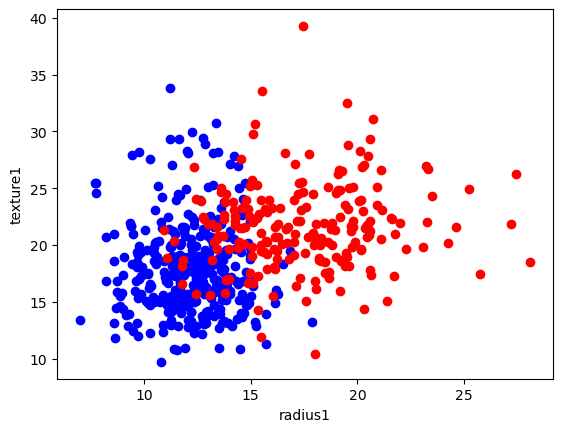

In [11]:
# 시험삼아 출력하였음
plot_by_diagnosis(bcanDF, 'radius1', 'texture1')

In [12]:
# 'B', 'M' 별 각 컬럼의 평균값의 차
mean_dif = bcanDF[is_benign].mean(numeric_only=True) - bcanDF[~is_benign].mean(numeric_only=True)

In [13]:
mean_dif['radius1':].sort_values()  # 정렬 결과 평균값 측면에서 가장 차이가 많은 피쳐 : area, perimeter, radius, texture

area3               -863.386881
area1               -515.586219
perimeter3           -54.364392
area2                -51.537257
perimeter1           -37.289971
radius3               -7.755010
texture3              -5.803138
radius1               -5.316306
texture1              -3.690144
perimeter2            -2.323608
radius2               -0.325000
concavity3            -0.284368
compactness3          -0.192152
concavity1            -0.114717
concave_points3       -0.107793
compactness1          -0.065103
concave_points1       -0.062273
symmetry3             -0.053222
smoothness3           -0.019886
symmetry1             -0.018723
concavity2            -0.015827
factal_dimension3     -0.012088
compactness2          -0.010843
smoothness1           -0.010421
concave_points2       -0.005203
factal_dimension2     -0.000426
symmetry2              0.000111
factal_dimension1      0.000187
smoothness2            0.000416
texture2               0.009465
dtype: float64

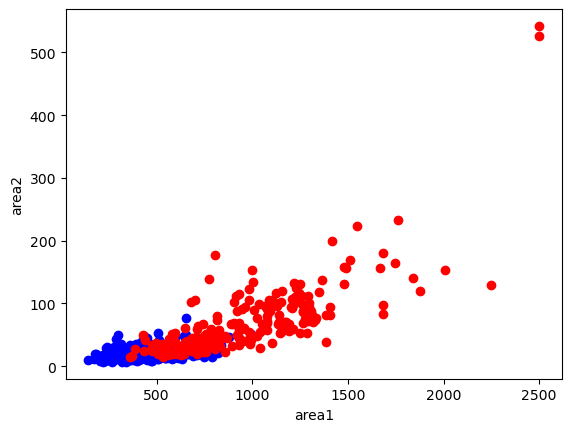

In [14]:
plot_by_diagnosis(bcanDF, 'area1', 'area2')     # 'area2' 컬럼에서 이상치 2개 발견

In [15]:
# 이상치 여부를 나타내는 컬럼 생성
bcanDF['outlier'] = False

In [16]:
area2_outlier = bcanDF['area2'] > 500

In [17]:
bcanDF[area2_outlier]

,ID,diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,factal_dimension3,outlier
212,8810703,M,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,...,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,False
461,911296202,M,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,...,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427,False


In [18]:
# 이상치 표시
bcanDF.loc[area2_outlier, 'outlier'] = True

In [19]:
is_benign = bcanDF.diagnosis == 'B'
not_outlier = bcanDF.outlier == False

def plot_by_dignosis_except_outlier(nrows, ncols, DF, feature_combinations: list):
    """
        nrows * ncols 의 틀에 각 feature_combination 에 해당하는 산점도 그래프를 그리는 함수 (이상치 제외)
        :param nrows: 행 수
        :param ncols: 열 수
        :param DF: 적용할 DataFrame
        :param feature_combinations: (피쳐 1, 피쳐 2) 형식의 조합으로 구성된 리스트
        :return: None
    """
    
    plt.figure(figsize=(5 * ncols, 3 * nrows))
    
    for idx in range(len(feature_combinations)):
        a, b = feature_combinations[idx]
        plt.subplot(nrows, ncols, idx+1)    # 서브플롯 생성 및 해당 서브플롯 선택
        plt.scatter(DF[is_benign & not_outlier][a], DF[is_benign & not_outlier][b], c='b')
        plt.scatter(DF[~is_benign & not_outlier][a], DF[~is_benign & not_outlier][b], c='r')
        plt.xlabel(a)
        plt.ylabel(b)
    plt.tight_layout()
    plt.show()
        

In [20]:
from itertools import combinations

my_list = [1, 2, 3 , 4]
result = list(combinations(my_list, 2))
print(result)

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


In [21]:
for i in result:
    a, b = i
    print(a, b)

1 2
1 3
1 4
2 3
2 4
3 4


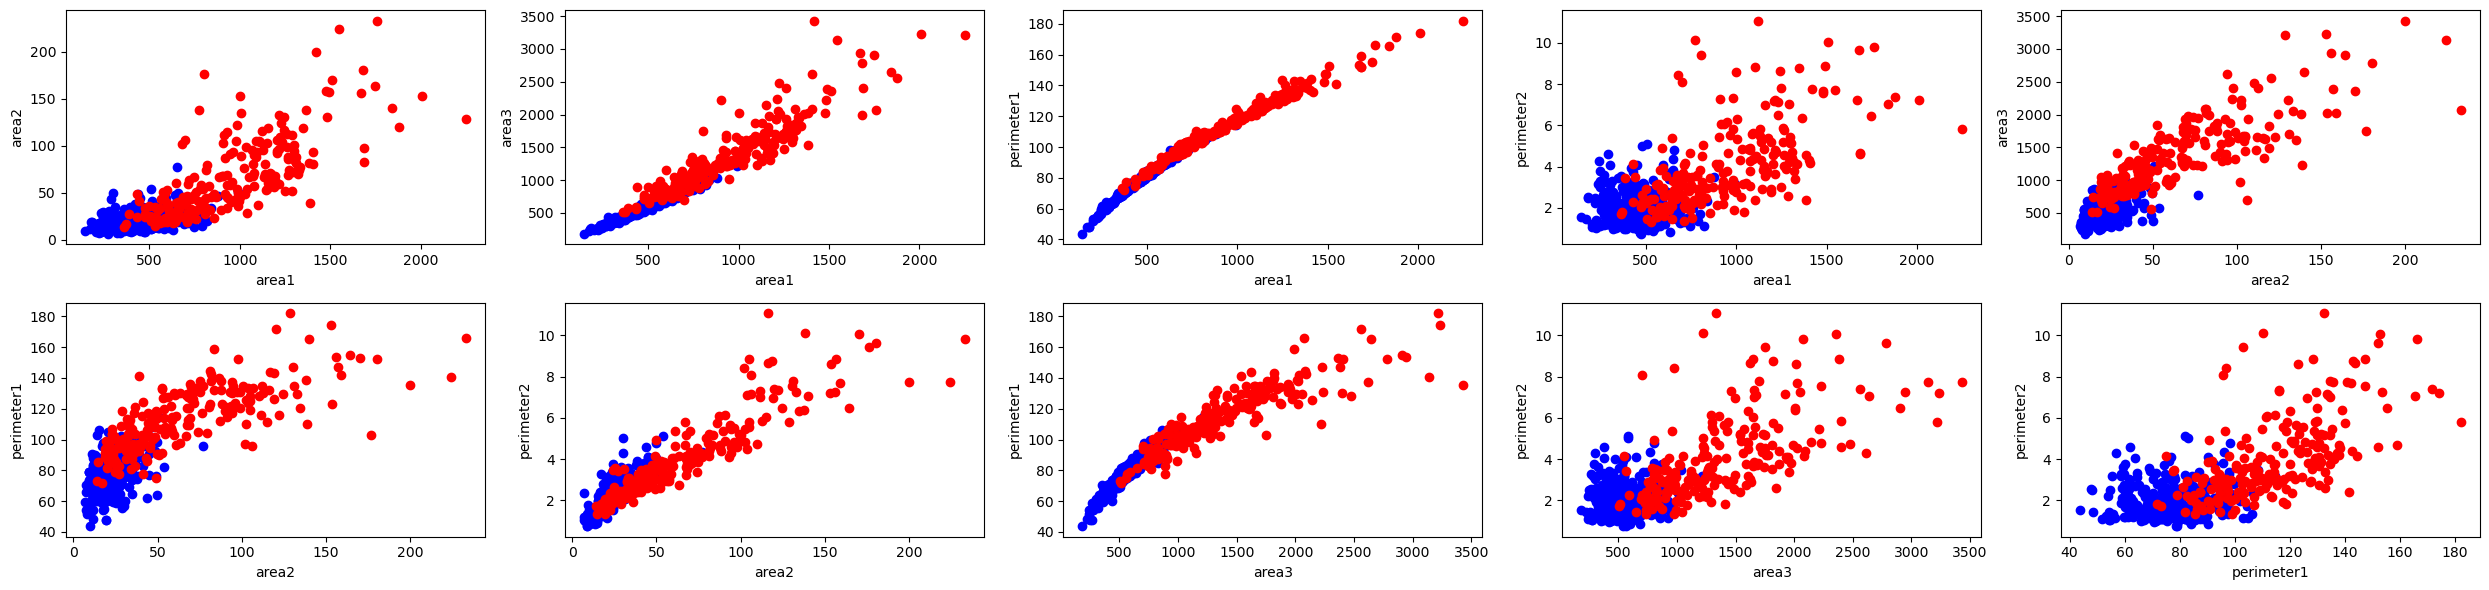

In [22]:
plot_by_dignosis_except_outlier(2, 5, bcanDF, list(combinations([f'area{i}' for i in range(1, 4)] + ['perimeter1', 'perimeter2'], 2)))

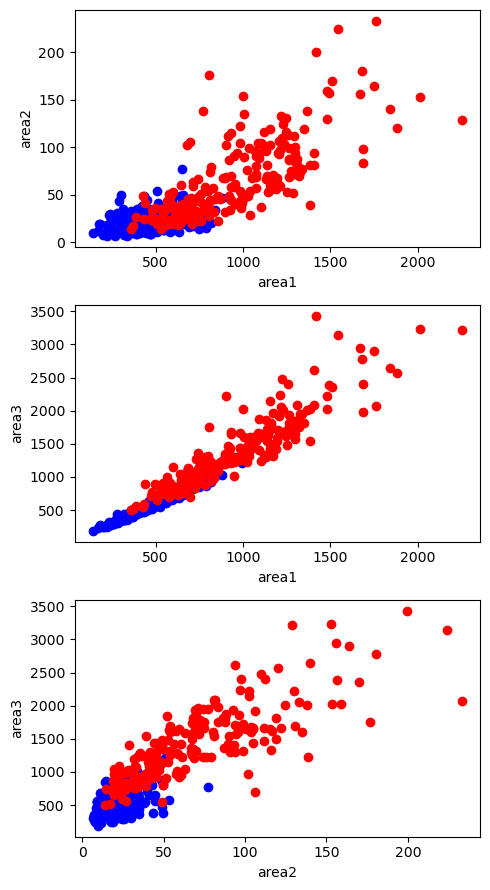

In [23]:
plot_by_dignosis_except_outlier(3, 1, bcanDF, list(combinations([f'area{i}' for i in range(1, 4)], 2)))

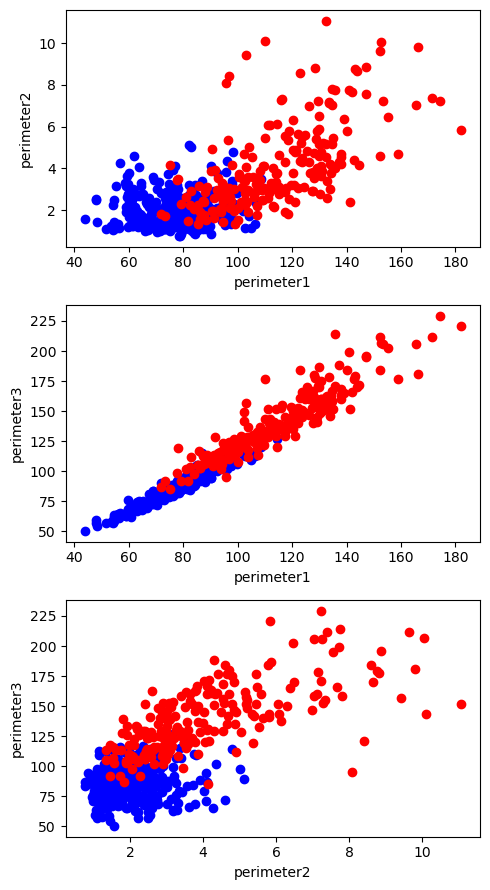

In [24]:
plot_by_dignosis_except_outlier(3, 1, bcanDF, list(combinations([f'perimeter{i}' for i in range(1, 4)], 2)))

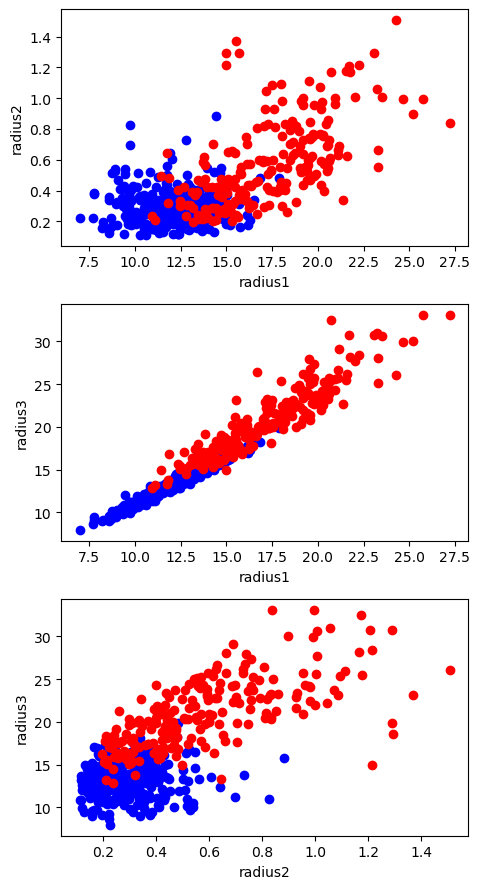

In [25]:
plot_by_dignosis_except_outlier(3, 1, bcanDF, list(combinations([f'radius{i}' for i in range(1, 4)], 2)))

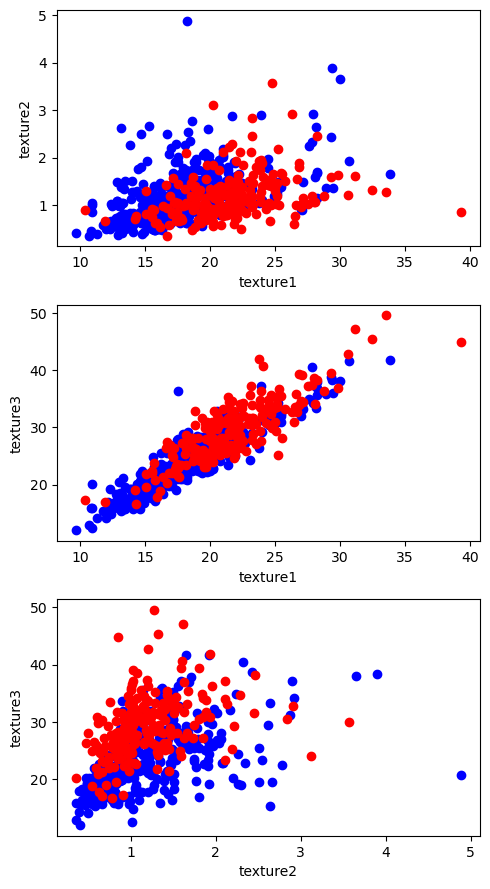

In [26]:
plot_by_dignosis_except_outlier(3, 1, bcanDF, list(combinations([f'texture{i}' for i in range(1, 4)], 2)))  # 많이 겹침

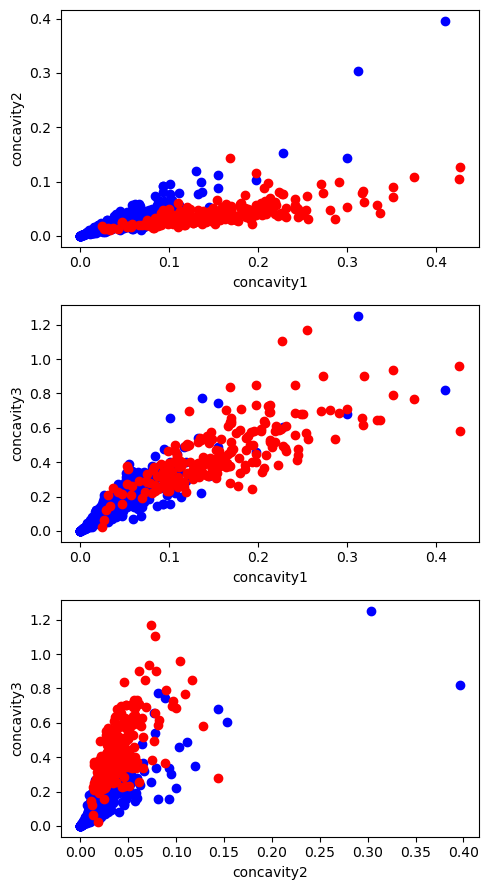

In [27]:
plot_by_dignosis_except_outlier(3, 1, bcanDF, list(combinations([f'concavity{i}' for i in range(1, 4)], 2)))    # 많이 겹침

(3) 기계학습 데이터셋 준비
- 사용할 피쳐 : area1\~3, perimeter1\~3, radius1~3
- 타겟        : diagnosis

In [28]:
feature_cols = [f'{f}{i}' for i in range(1, 4) for f in ['area', 'perimeter', 'radius']]

In [29]:
# 피쳐, 타겟 분리
featureDF = bcanDF.loc[not_outlier, feature_cols]
targetSR = bcanDF.loc[not_outlier, 'diagnosis']

In [30]:
featureDF.shape, targetSR.shape

((567, 9), (567,))

In [31]:
from sklearn.model_selection import train_test_split
# 훈련 데이터, 테스트 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2, random_state=2024, stratify=targetSR)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((453, 9), (453,), (114, 9), (114,))

In [32]:
# 'B', 'M' 비율 비슷하게 분리되었는지 확인
print(f'{y_train.value_counts() / y_train.shape[0]}')
print(f'{y_test.value_counts() / y_test.shape[0]}')

diagnosis
B    0.629139
M    0.370861
Name: count, dtype: float64
diagnosis
B    0.631579
M    0.368421
Name: count, dtype: float64


In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [34]:
# 학습용 데이터 피쳐 스케일링
scaled_x_train = scaler.transform(x_train)
# 테스트용 데이터 피쳐 스케일링
scaled_x_test = scaler.transform(x_test)

(4-1) 학습 진행 & 성능 평가 - KNN Classifier

In [35]:
# 모듈 로딩
from sklearn.neighbors import KNeighborsClassifier

In [36]:
train_scoreList = []
test_scoreList = []

for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_x_train, y_train)
    train_scoreList.append(knn.score(scaled_x_train, y_train))
    test_scoreList.append(knn.score(scaled_x_test, y_test))

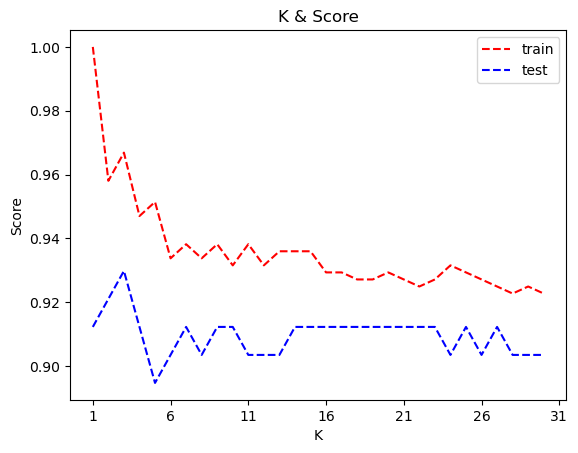

In [37]:
# K 개수에 따른 학습용/테스트용 점수 시각화
plt.plot(train_scoreList, 'r--', label='train')
plt.plot(test_scoreList, 'b--', label='test')
plt.title('K & Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.xticks(range(0, 31, 5), range(1, 32, 5))
plt.legend()
plt.show()

In [38]:
# 테스트 점수 평균
sum(test_scoreList) / len(test_scoreList)

0.9096491228070178

In [39]:
# y값(예측값)이 연속형일 경우 (회귀) 사용할 수 있는 성능 평가 방법
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
# y값(예측값)이 연속형이 아닐 경우 (분류)
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

In [41]:
# K=30 일 때의 KNN Classifier의 F1-Score
print(f'B 기준 : {f1_score(y_test, knn.predict(scaled_x_test), pos_label="B")}')
print(f'M 기준 : {f1_score(y_test, knn.predict(scaled_x_test), pos_label="M")}')

B 기준 : 0.9261744966442952
M 기준 : 0.860759493670886


(4-2) 학습 진행 & 성능 평가 - Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [44]:
print(f'[Train Score] {model.score(x_train, y_train)}\n[Test Score] {model.score(x_test, y_test)}')

[Train Score] 0.9470198675496688
[Test Score] 0.9473684210526315


In [45]:
f1_score(y_test, model.predict(x_test), average='weighted')

0.9473684210526315

[결론]  
피쳐로 area1\~3, perimeter1\~3, radius1~3 를 사용했을 때,  
KNN Classifier 의 평균 score : 0.909  
Logistic Regression 의 평균 score : 0.947  
따라서, Logistic Regression 모델이 더 좋은 성능을 발휘하였다.  